## COVID-19 Daily Analysis Table  
  - source:  official data collected by John Hopkins, Stats by Country,  https://github.com/CSSEGISandData/ 
  - worst daily deaths by country evaluating last 7 days
  - charts:  https://dasn.herokuapp.com/covidzoom compare, and https://dasn.herokuapp.com/covid19
  - SUMMARY WARNING ON COUNTRIES BY COVID DAILY DEATH RATES 

In [16]:
try:  ## This table sumarizes the daily deaths by country (calculations below)   %store df9  
    display(df9.transpose().tail(3) )
    print("worst daily deaths by country evaluating last 7 days:")
    display(df9.transpose().tail(9).head(9).mean(axis=0).sort_values(ascending=False).head(7) )
except NameError:
    print("Click Run on this cell only after the RUN ALL completes all calculations")

Country/Region,US,France,United Kingdom,Italy,Spain,Brazil,Germany,Belgium,Iran,Turkey,Ecuador,Canada,Mexico,Sweden,Canada,India
4/25/20,1806,369,813,415,378,353,117,238,76,106,0,106,84,40,54,45
4/26/20,1126,242,413,260,288,229,99,177,60,99,0,70,46,2,44,56
4/27/20,1378,437,360,333,331,317,150,113,96,95,87,84,83,80,63,58


worst daily deaths by country evaluating last 7 days:


Country/Region
US                1955.000000
United Kingdom     625.333333
France             441.111111
Italy              416.666667
Spain              386.444444
Brazil             249.888889
Belgium            194.888889
dtype: float64

### How is this daily Calculus performed :   https://github.com/infchg/COVID-19
  - calculations in iPython at  https://github.com/infchg/COVID-19/JH-calculate-daily.ipynb
  - source data https://github.com/CSSEGISandData/COVID-19/
  - resources thanks to  http://Jupyter.org  http://MyBinder.org  http://Heroku.com

In [2]:
!pip install pandas seaborn
# initial installations 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 10.0 MB 3.3 MB/s eta 0:00:01    |███████                         | 2.2 MB 3.3 MB/s eta 0:00:03
     |████████████████████████████████| 215 kB 60.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 56.6 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 61.7 MB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 26.1 MB 25.4 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 11.9 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.7 MB/s  eta 0:00:01


In [3]:
 ##JH Source THIS IS THE SOURCE OF ALL CALCULATIONS IN THIS PAGE
! curl -OL https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   213  100   213    0     0   1852      0 --:--:-- --:--:-- --:--:--  1852
100 64984  100 64984    0     0   270k      0 --:--:-- --:--:-- --:--:--  270k


In [4]:
# ! egrep -e ',[0-9]{3,}$' -e ^Provi  -e ',[6-9].$' tim*dea*csv > over50.csv
! egrep -e ',[^,][^,][^,]+$' -e ^Provi   tim*dea*csv > over50.csv
import pandas as pd
df=pd.read_csv('over50.csv')
df.set_index('Country/Region',inplace=True)  # .T
type(df)

pandas.core.frame.DataFrame

In [5]:
cols20 = df.columns[-13:].tolist()
idx = cols20 # cols21 = df.columns[-14:-1].tolist()
#display( )idx=['Country/Region']+cols20   #no need with set index
display(df.sort_values(by=[df.columns[-1]],ascending=False)[cols20] )

,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
Country/Region,,,,,,,,,,,,,
US,28338,32930,36787,38664,40661,42094,44444,46622,49954,51949,53755,54881,56259
Italy,21645,22170,22745,23227,23660,24114,24648,25085,25549,25969,26384,26644,26977
Spain,18708,19315,20002,20043,20453,20852,21282,21717,22157,22524,22902,23190,23521
France,17167,17920,18681,19323,19718,20265,20796,21340,21856,22245,22614,22856,23293
United Kingdom,12868,13729,14576,15464,16060,16509,17337,18100,18738,19506,20319,20732,21092
Belgium,4440,4857,5163,5453,5683,5828,5998,6262,6490,6679,6917,7094,7207
Germany,3804,4052,4352,4459,4586,4862,5033,5279,5575,5760,5877,5976,6126
Iran,4777,4869,4958,5031,5118,5209,5297,5391,5481,5574,5650,5710,5806
Brazil,1736,1924,2141,2354,2462,2587,2741,2906,3331,3704,4057,4286,4603


In [6]:
#df['LastDay']=df[df.columns[-1]]-df[df.columns[-2]] 
df0=df[idx].copy()  #()
type(df)
#for (coln, cold) in df.iteritems():
#    print(coln, '->', cold)
for i in range(1,13):
         df0[df0.columns[-i]] =    (df0[df.columns[-i]]-df0[df0.columns[-i-1]]) # casualties last day

## COVID Daily deaths 
Spain Italy US France UK Netherlands Iran Germany (updated March-30th)   

In [7]:
df0.pop( df0.columns[0] )   # 0 
df9=df0.sort_values(by=[df.columns[-1]],ascending=False).head(16)
display(df9) 

,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
Country/Region,,,,,,,,,,,,
US,4592,3857,1877,1997,1433,2350,2178,3332,1995,1806,1126,1378
France,753,761,642,395,547,531,544,516,389,369,242,437
United Kingdom,861,847,888,596,449,828,763,638,768,813,413,360
Italy,525,575,482,433,454,534,437,464,420,415,260,333
Spain,607,687,41,410,399,430,435,440,367,378,288,331
Brazil,188,217,213,108,125,154,165,425,373,353,229,317
Germany,248,300,107,127,276,171,246,296,185,117,99,150
Belgium,417,306,290,230,145,170,264,228,189,238,177,113
Iran,92,89,73,87,91,88,94,90,93,76,60,96


In [8]:
print(','.join('Mr%.0f' %x for x in range(18,30+1))  ,'\ndata-datasets="')
print('"\ndata-datasets="'.join(','.join('%.0f' %x for x in y) for y in df9.values) )

Mr18,Mr19,Mr20,Mr21,Mr22,Mr23,Mr24,Mr25,Mr26,Mr27,Mr28,Mr29,Mr30 
data-datasets="
4592,3857,1877,1997,1433,2350,2178,3332,1995,1806,1126,1378"
data-datasets="753,761,642,395,547,531,544,516,389,369,242,437"
data-datasets="861,847,888,596,449,828,763,638,768,813,413,360"
data-datasets="525,575,482,433,454,534,437,464,420,415,260,333"
data-datasets="607,687,41,410,399,430,435,440,367,378,288,331"
data-datasets="188,217,213,108,125,154,165,425,373,353,229,317"
data-datasets="248,300,107,127,276,171,246,296,185,117,99,150"
data-datasets="417,306,290,230,145,170,264,228,189,238,177,113"
data-datasets="92,89,73,87,91,88,94,90,93,76,60,96"
data-datasets="125,126,121,127,123,119,117,115,109,106,99,95"
data-datasets="15,18,35,18,33,13,17,23,16,0,0,87"
data-datasets="143,58,0,132,119,105,90,109,97,106,70,84"
data-datasets="37,60,104,36,26,145,113,99,152,84,46,83"
data-datasets="130,67,111,29,40,185,172,84,131,40,2,80"
data-datasets="105,34,40,27,33,70,68,44,56,54,44,63"
data-datasets="43,38,35,3

In [9]:
dxy=df0.transpose()
display(dxy.tail(4)) #pivot('Country/Region')

Country/Region,Algeria,Argentina,Austria,Bangladesh,Belgium,Brazil,Canada,Canada,Canada,Chile,...,Russia,Saudi Arabia,Serbia,Spain,Sweden,Switzerland,Turkey,Ukraine,United Kingdom,US
4/24/20,8,11,8,4,189,373,4,56,97,6,...,60,6,0,367,131,40,109,14,768,1995
4/25/20,4,9,6,9,238,353,2,54,106,7,...,66,9,0,378,40,10,106,0,813,1806
4/26/20,6,7,6,5,177,229,0,44,70,8,...,66,3,0,288,2,11,99,8,413,1126
4/27/20,7,5,7,7,113,317,4,63,84,9,...,47,5,0,331,80,55,95,11,360,1378


In [10]:
#Worst 7 countries in daily deaths last week 
df9.transpose().tail(8).head(7).mean(axis=0).sort_values(ascending=False).head(7)    #1 Average for each row :

Country/Region
US                2031.428571
United Kingdom     667.428571
France             448.285714
Italy              426.285714
Spain              391.000000
Brazil             260.571429
Belgium            201.571429
dtype: float64

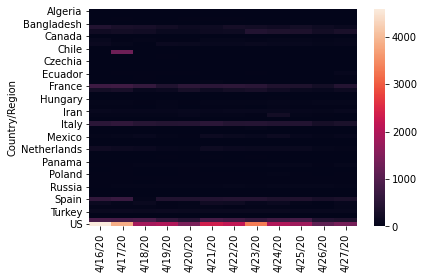

In [11]:
import seaborn as sns
%matplotlib inline
sns.heatmap(df0)#, annot=True

###  Daily casualties Heat Map 
   in order of daily casualties : Italy Spain US France UK Iran Netherlands 

52 13.0


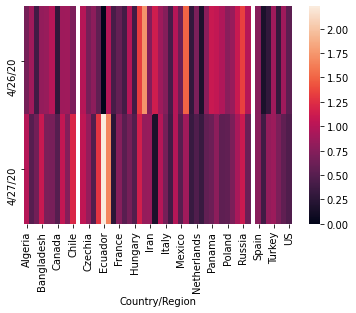

In [12]:
print( len(dxy.columns) ,dxy['Austria'].tail(20).mean() ) #   with ()   sns.heatmap(dxy)
drel=dxy.copy()
for r in drel.columns:
    #print (r,    drel[r].tail(5).mean() )
    drel[r] =  drel[r] / drel[r].tail(11).mean()
    
dinc=df0.copy()  #increase 
Days2 = dxy.tail(2).mean() 
Days4 = dxy.tail(5).head(2).mean() 
increaserate=round(Days2/Days4,1)
#display( increaserate )
   
for i in range(1,6):
         dinc[df0.columns[-i]] =    (df0[df0.columns[-i]]+df0[df0.columns[-i-1]])  /  (df0[df0.columns[-i-4]]+df0[df0.columns[-i-3]])  
        
sns.heatmap(dinc.transpose().tail(2))    

In [13]:
print("By worst aspect due exponential increase: Sweden UK US Belgium Germany \n Strangely constant : Iran , Recovered: China ")
#drel.loc[['3/27/20']].transpose().sort_values(by=[df.columns[-1]],ascending=False)
drel.iloc[[-1]].transpose().sort_values(by=[df.columns[-1]],ascending=False)

By worst aspect due exponential increase: Sweden UK US Belgium Germany 
 Strangely constant : Iran , Recovered: China 


,4/27/20
Country/Region,
Ecuador,3.680769
Switzerland,1.575521
Egypt,1.560284
Canada,1.517241
Moldova,1.375000
Brazil,1.301605
Canada,1.300188
India,1.299389
Poland,1.197581


In [14]:
%matplotlib inline
#dxy.plot(xticks=dxy.index,yticks=dxy.Austria)

In [15]:
!pip install chart-studio urllib3 # plotly

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 64 kB 2.1 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=be314ed8e0f6e356e6d03429520975dab6c057070d352784884cb965a8b1eac3
  Stored in directory: /home/jovyan/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
